In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [39]:
df_train = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df_train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [9]:
len(df_train.columns)

19

In [42]:
df_train['duration'] =  df_train['tpep_dropoff_datetime'] - df_train['tpep_pickup_datetime']
df_train.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.0,0.5,0.0,0.0,1.0,14.3,2.5,0.0,0 days 00:08:26
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.0,0.5,4.0,0.0,1.0,16.9,2.5,0.0,0 days 00:06:19


In [43]:
df_train['duration'] = df_train.duration.apply(lambda td: td.total_seconds()/60)
df_train.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.0,0.5,0.0,0.0,1.0,14.3,2.5,0.0,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.0,0.5,4.0,0.0,1.0,16.9,2.5,0.0,6.316667


In [12]:
np.std(df_train.duration)

42.59434429744777

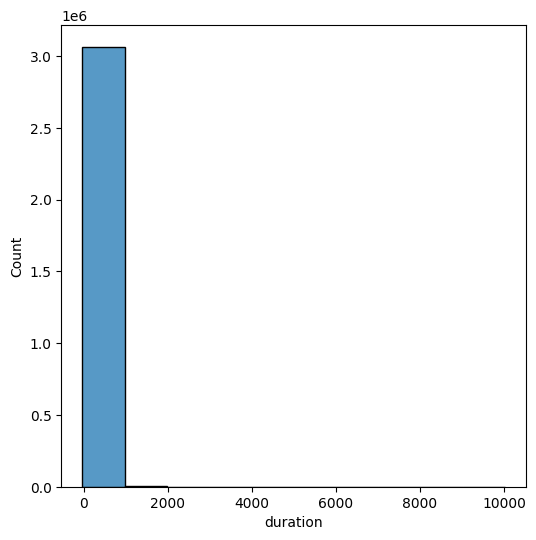

In [13]:
plt.figure(figsize=(6,6))
sns.histplot(df_train.duration,bins=10)
plt.show()

In [48]:
df_before = len(df_train)
df_filtered = df_train[(df_train.duration > 1) & (df_train.duration < 60)]
df_after = len(df_filtered)

In [15]:
df_after / df_before  * 100

98.11146334607858

In [50]:
categories =  ['PULocationID','DOLocationID']

In [51]:
df_filtered[categories] = df_filtered[categories].astype(str)

<ipython-input-51-9340d6049d4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[categories] = df_filtered[categories].astype(str)


In [52]:
dv = DictVectorizer()
train_dicts = df_filtered[categories].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [53]:
X_train

<3008849x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6017698 stored elements in Compressed Sparse Row format>

In [20]:
y_train = df_filtered['duration'].values
y_train


array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [21]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
mean_squared_error(y_train,y_pred,squared=False)

7.647511913909091

In [38]:
df_val = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
df_val.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.3,1.0,N,142,163,2,4.4,3.5,0.5,0.0,0.0,1.0,9.4,2.5,0.0
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.0,1.0,N,71,71,4,-3.0,-1.0,-0.5,0.0,0.0,-1.0,-5.5,0.0,0.0


In [45]:
df_val['duration'] = df_val['tpep_dropoff_datetime'] - df_val['tpep_pickup_datetime']
df_val['duration'] = df_val.duration.apply(lambda td:td.total_seconds()/60)

In [54]:
df_val = df_val[( df_val.duration > 1 ) & ( df_val.duration < 60 )]

In [55]:
df_val[categories] = df_val[categories].astype(str)

In [56]:
val_dicts = df_val[categories].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [57]:
(X_train,X_val)

(<3008849x515 sparse matrix of type '<class 'numpy.float64'>'
 	with 6017698 stored elements in Compressed Sparse Row format>,
 <2855558x515 sparse matrix of type '<class 'numpy.float64'>'
 	with 5711108 stored elements in Compressed Sparse Row format>)

In [36]:
y_val = df_val['duration'].values
y_val

array([ 1.68333333, 32.08333333, 13.3       , ..., 14.        ,
        7.        ,  9.8       ])

In [58]:
y_pred = lr.predict(X_val)
mean_squared_error(y_val,y_pred,squared=False)

7.808396366563407

In [49]:
df_filtered.shape,df_val.shape

((3008849, 20), (2855558, 20))